In [1]:
# import os
# import re
# import pandas as pd
!pip install pandas matplotlib
# def extract_results_from_md_files(path):
#     results = []

#     for root, dirs, files in os.walk(path):
#         for file in files:
#             if file.endswith("result.md"):
#                 filepath = os.path.join(root, file)
#                 with open(filepath, "r", encoding="utf-8") as f:
#                     content = f.read()

#                 # 파일명 예시: phase1_experimentA_checkpoint-4000_result.md
#                 match_name = re.search(r'phase1_(.+?)_checkpoint-(\d+)_test_outputs_result\.md', file)
#                 if not match_name:
#                     continue
#                 name = match_name.group(1)
#                 step = int(match_name.group(2))

#                 # 결과값 추출
#                 choice_match = re.search(r"선다형 결과:.*?Accuracy\s*=\s*([0-9.]+)", content, re.DOTALL)
#                 short_match = re.search(r"단답형 결과:.*?Exact\s*=\s*([0-9.]+)", content, re.DOTALL)
#                 long_match = re.search(r"서술형 결과:.*?ROUGE-1\s*=\s*([0-9.]+)", content, re.DOTALL)
#                 total_match = re.search(r"종합 순위:\s*-+\s*1\.\s+\w+\s*:\s*([0-9.]+)", content)

#                 results.append({
#                     "name": name,
#                     "선다형": float(choice_match.group(1)) if choice_match else None,
#                     "단답형": float(short_match.group(1)) if short_match else None,
#                     "서술형": float(long_match.group(1)) if long_match else None,
#                     "종합": float(total_match.group(1)) if total_match else None,
#                     "step": step,
#                 })

#     df = pd.DataFrame(results)
#     return df

import os
import re
import pandas as pd

def extract_results_from_md_files(path):
    results = []

    for root, dirs, files in os.walk(path):
        for file in files:
            if not file.endswith("result.md"):
                continue

            filepath = os.path.join(root, file)
            with open(filepath, "r", encoding="utf-8") as f:
                content = f.read()

            # case 1: checkpoint가 있는 경우
            match_ckpt = re.search(r'phase1_(.+?)_checkpoint-(\d+)_test_outputs_result\.md', file)
            if match_ckpt:
                name = match_ckpt.group(1)
                step = int(match_ckpt.group(2))
            else:
                # case 2: base 모델 (checkpoint 없음)
                match_base = re.search(r'phase1_(.+?)_test_outputs_result\.md', file)
                if not match_base:
                    continue
                name = match_base.group(1)
                step = 0  # base 모델의 경우 step은 0으로

            # 결과값 추출
            choice_match = re.search(r"선다형 결과:.*?Accuracy\s*=\s*([0-9.]+)", content, re.DOTALL)
            short_match = re.search(r"단답형 결과:.*?Exact\s*=\s*([0-9.]+)", content, re.DOTALL)
            long_match = re.search(r"서술형 결과:.*?ROUGE-1\s*=\s*([0-9.]+)", content, re.DOTALL)
            total_match = re.search(r"종합 순위:\s*-+\s*1\.\s+\w+\s*:\s*([0-9.]+)", content)

            results.append({
                "name": name,
                "선다형": float(choice_match.group(1)) if choice_match else None,
                "단답형": float(short_match.group(1)) if short_match else None,
                "서술형": float(long_match.group(1)) if long_match else None,
                "종합": float(total_match.group(1)) if total_match else None,
                "step": step,
                "is_base": (step == 0)
            })

    df = pd.DataFrame(results)
    return df


In [2]:
df = extract_results_from_md_files("/workspace/korean_culture_QA_2025/results")
df

,name,선다형,단답형,서술형,종합,step,is_base
0,grpo_v5_Midm-2.0-Base-Instruct_curri_선다형_단답형_v...,0.819,0.725,0.313,0.667,52,False
1,grpo_v5_Midm-2.0-Base-Instruct_curri_선다형_단답형_v...,0.819,0.725,0.313,0.667,65,False
2,grpo_v5_Midm-2.0-Base-Instruct_curri_선다형_단답형_v...,0.819,0.725,0.313,0.667,78,False
3,grpo_v5_Midm-2.0-Base-Instruct_curri_선다형_단답형_v...,0.819,0.725,0.313,0.667,91,False
4,grpo_v5_Midm-2.0-Base-Instruct_curri_선다형_단답형_v...,0.819,0.725,0.313,0.667,11,False
...,...,...,...,...,...,...,...
197,grpo_v2_A.X-4.0-Light_선다형_단답형,0.824,0.627,0.442,0.677,112,False
198,grpo_v2_A.X-4.0-Light_선다형_단답형,0.819,0.686,0.437,0.689,56,False
199,grpo_v2_A.X-4.0-Light_선다형_단답형,0.845,0.676,0.443,0.700,28,False
200,checkpoint-95_merged,0.777,0.618,0.459,0.656,0,True


In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 폰트 경로와 이름 확인
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
print("사용할 폰트 이름:", font_name)  # NanumGothic 출력 예상

# matplotlib에 한글 폰트 적용
mpl.rcParams['font.family'] = font_name
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

FileNotFoundError: [Errno 2] No such file or directory: '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

In [4]:

# import matplotlib.pyplot as plt

# def plot_metrics_by_name(df):
#     metrics = ["선다형", "단답형", "서술형"]

#     for metric in metrics:
#         plt.figure(figsize=(10, 6))
#         for name in df["name"].unique():
#             sub_df = df[df["name"] == name].sort_values(by="step")

#             base_row = sub_df[sub_df["is_base"] == True]
#             ckpt_rows = sub_df[sub_df["is_base"] == False]

#             # base 모델 점선 (수평선)
#             if not base_row.empty:
#                 y_val = base_row[metric].values[0]
#                 plt.axhline(y=y_val, linestyle='dashed', label=f"{name} (base)", alpha=0.6)

#             # 체크포인트 모델 선 그래프
#             if not ckpt_rows.empty:
#                 plt.plot(ckpt_rows["step"], ckpt_rows[metric], marker='o', label=name)

#         plt.title(f"{metric} Accuracy by Step")
#         plt.xlabel("Step")
#         plt.ylabel(metric)
#         plt.legend(title="Name")
#         plt.grid(True)
#         plt.tight_layout()
#         plt.show()
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

def plot_metrics_by_name(df):
    metrics = ["선다형", "단답형", "서술형"]
    unique_names = df["name"].unique()
    
    # 컬러맵에서 name마다 고유 색상 지정
    colors = plt.cm.get_cmap("tab10", len(unique_names))
    name_to_color = {name: colors(i) for i, name in enumerate(unique_names)}

    for metric in metrics:
        plt.figure(figsize=(10, 6))

        for name in unique_names:
            sub_df = df[df["name"] == name].sort_values(by="step")
            base_row = sub_df[sub_df["is_base"] == True]
            ckpt_rows = sub_df[sub_df["is_base"] == False]

            color = name_to_color[name]

            # base 모델: 점선 (같은 색상)
            if not base_row.empty:
                y_val = base_row[metric].values[0]
                plt.axhline(
                    y=y_val,
                    linestyle='dashed',
                    color=color,
                    label=f"{name} (base)",
                    linewidth=1.5,
                    alpha=0.8
                )

            # 체크포인트 모델: 실선 + 마커
            if not ckpt_rows.empty:
                plt.plot(
                    ckpt_rows["step"],
                    ckpt_rows[metric],
                    marker='o',
                    color=color,
                    label=f"{name}",
                    linewidth=2
                )

        plt.title(f"{metric} Accuracy by Step")
        plt.xlabel("Step")
        plt.ylabel(metric)
        plt.ylim(0.6,0.9)
        plt.legend(title="Model Name", loc='best')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


/tmp/ipykernel_17762/909181463.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_names))
/tmp/ipykernel_17762/909181463.py:81: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_17762/909181463.py:81: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_17762/909181463.py:81: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_17762/909181463.py:81: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_17762/909181463.py:81: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from font

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

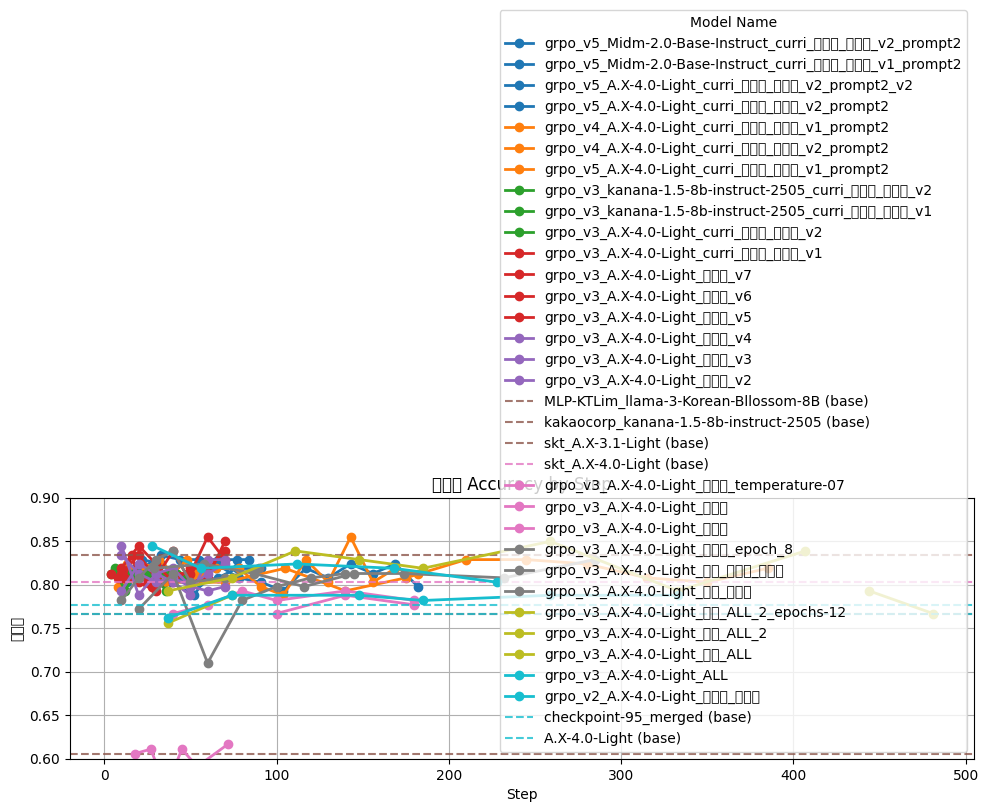

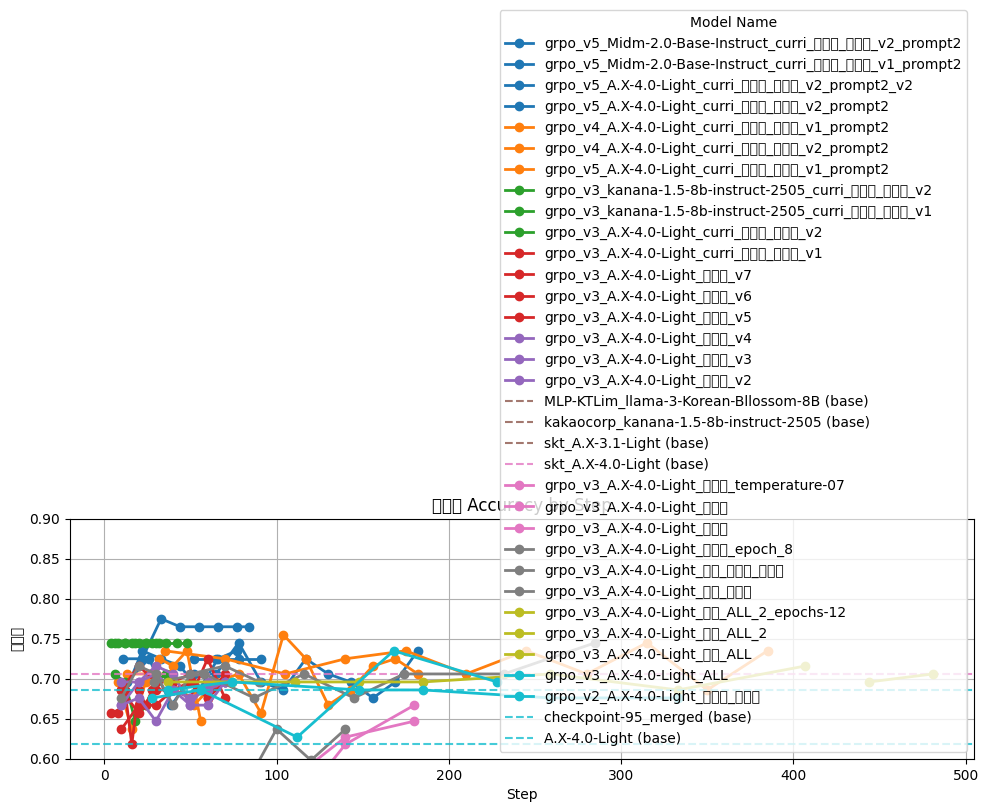

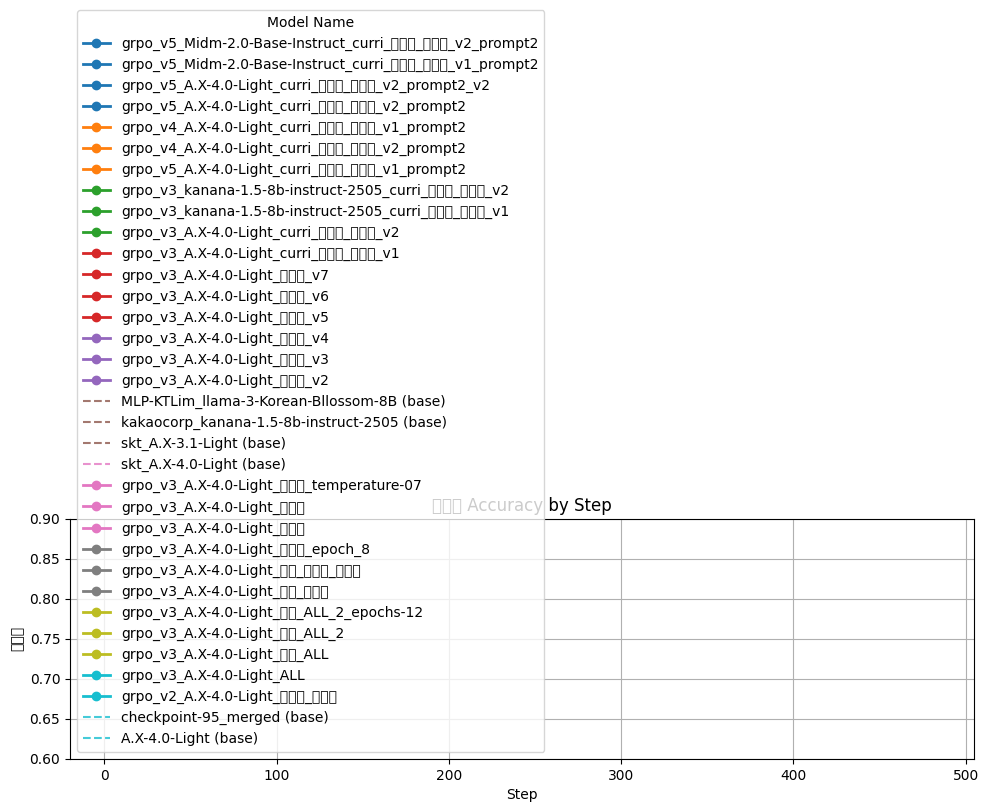

In [5]:
plot_metrics_by_name(df)

In [9]:
import re

text = """dfdf
둘째줄 내용

 첫째줄 공백
이 줄까지 파싱됨

다른 케이스
"""

# 첫째줄이 공백이면 첫째+둘째줄, 아니면 첫째줄만 파싱
pattern = re.compile(r'^(?:\s*\n.*|[^\s].*)')

matches = pattern.findall(text)

for match in matches:
    print("파싱된 결과:", repr(match))


파싱된 결과: 'dfdf'


In [10]:
matches

['dfdf']